In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.drop(columns=['day','year'],inplace=True)

In [6]:
df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,6,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,6,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,6,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,6,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        245 non-null    object
 1   Temperature  245 non-null    object
 2    RH          245 non-null    object
 3    Ws          245 non-null    object
 4   Rain         245 non-null    object
 5   FFMC         245 non-null    object
 6   DMC          245 non-null    object
 7   DC           245 non-null    object
 8   ISI          245 non-null    object
 9   BUI          245 non-null    object
 10  FWI          245 non-null    object
 11  Classes      244 non-null    object
dtypes: object(12)
memory usage: 23.3+ KB


In [8]:
df[df.isnull().any(axis=1)]

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,7,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        245 non-null    object 
 1   Temperature  245 non-null    object 
 2    RH          245 non-null    object 
 3    Ws          245 non-null    object 
 4   Rain         245 non-null    object 
 5   FFMC         245 non-null    object 
 6   DMC          245 non-null    object 
 7   DC           245 non-null    object 
 8   ISI          245 non-null    object 
 9   BUI          245 non-null    object 
 10  FWI          245 non-null    object 
 11  Classes      244 non-null    object 
 12  Region       247 non-null    float64
dtypes: float64(1), object(12)
memory usage: 25.2+ KB


In [11]:
df[['Region']]=df[['Region']].astype(int)

In [12]:
df.isnull().sum()

month          2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [13]:
df=df.dropna().reset_index(drop=True)

In [14]:
df.isnull().sum()

month          0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [15]:
df.iloc[[122]]

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [16]:
df=df.drop(122).reset_index(drop=True)

In [17]:
df.iloc[[122]]

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,6,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [18]:
df.columns

Index(['month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [19]:
df.columns=df.columns.str.strip() ##blank spaces from column name removed
df.columns

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        243 non-null    object
 1   Temperature  243 non-null    object
 2   RH           243 non-null    object
 3   Ws           243 non-null    object
 4   Rain         243 non-null    object
 5   FFMC         243 non-null    object
 6   DMC          243 non-null    object
 7   DC           243 non-null    object
 8   ISI          243 non-null    object
 9   BUI          243 non-null    object
 10  FWI          243 non-null    object
 11  Classes      243 non-null    object
 12  Region       243 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 24.8+ KB


In [21]:
df[['month','Temperature','RH','Ws']]=df[['month','Temperature','RH','Ws']].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        243 non-null    int64 
 1   Temperature  243 non-null    int64 
 2   RH           243 non-null    int64 
 3   Ws           243 non-null    int64 
 4   Rain         243 non-null    object
 5   FFMC         243 non-null    object
 6   DMC          243 non-null    object
 7   DC           243 non-null    object
 8   ISI          243 non-null    object
 9   BUI          243 non-null    object
 10  FWI          243 non-null    object
 11  Classes      243 non-null    object
 12  Region       243 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 24.8+ KB


In [23]:
obj=[f for f in df.columns if df[f].dtypes=='O']

In [24]:
obj

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [25]:
for i in obj:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        243 non-null    int64  
 1   Temperature  243 non-null    int64  
 2   RH           243 non-null    int64  
 3   Ws           243 non-null    int64  
 4   Rain         243 non-null    float64
 5   FFMC         243 non-null    float64
 6   DMC          243 non-null    float64
 7   DC           243 non-null    float64
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  Classes      243 non-null    object 
 12  Region       243 non-null    int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 24.8+ KB


In [27]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [28]:
df['Classes']=np.where(df['Classes'].str.contains('not fire',regex=False),0,1) 
##if not fire then 0 otherwise 1

In [29]:
df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [30]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [31]:
df[['Classes']]=df[['Classes']].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        243 non-null    int64  
 1   Temperature  243 non-null    int64  
 2   RH           243 non-null    int64  
 3   Ws           243 non-null    int64  
 4   Rain         243 non-null    float64
 5   FFMC         243 non-null    float64
 6   DMC          243 non-null    float64
 7   DC           243 non-null    float64
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  Classes      243 non-null    int64  
 12  Region       243 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 24.8 KB


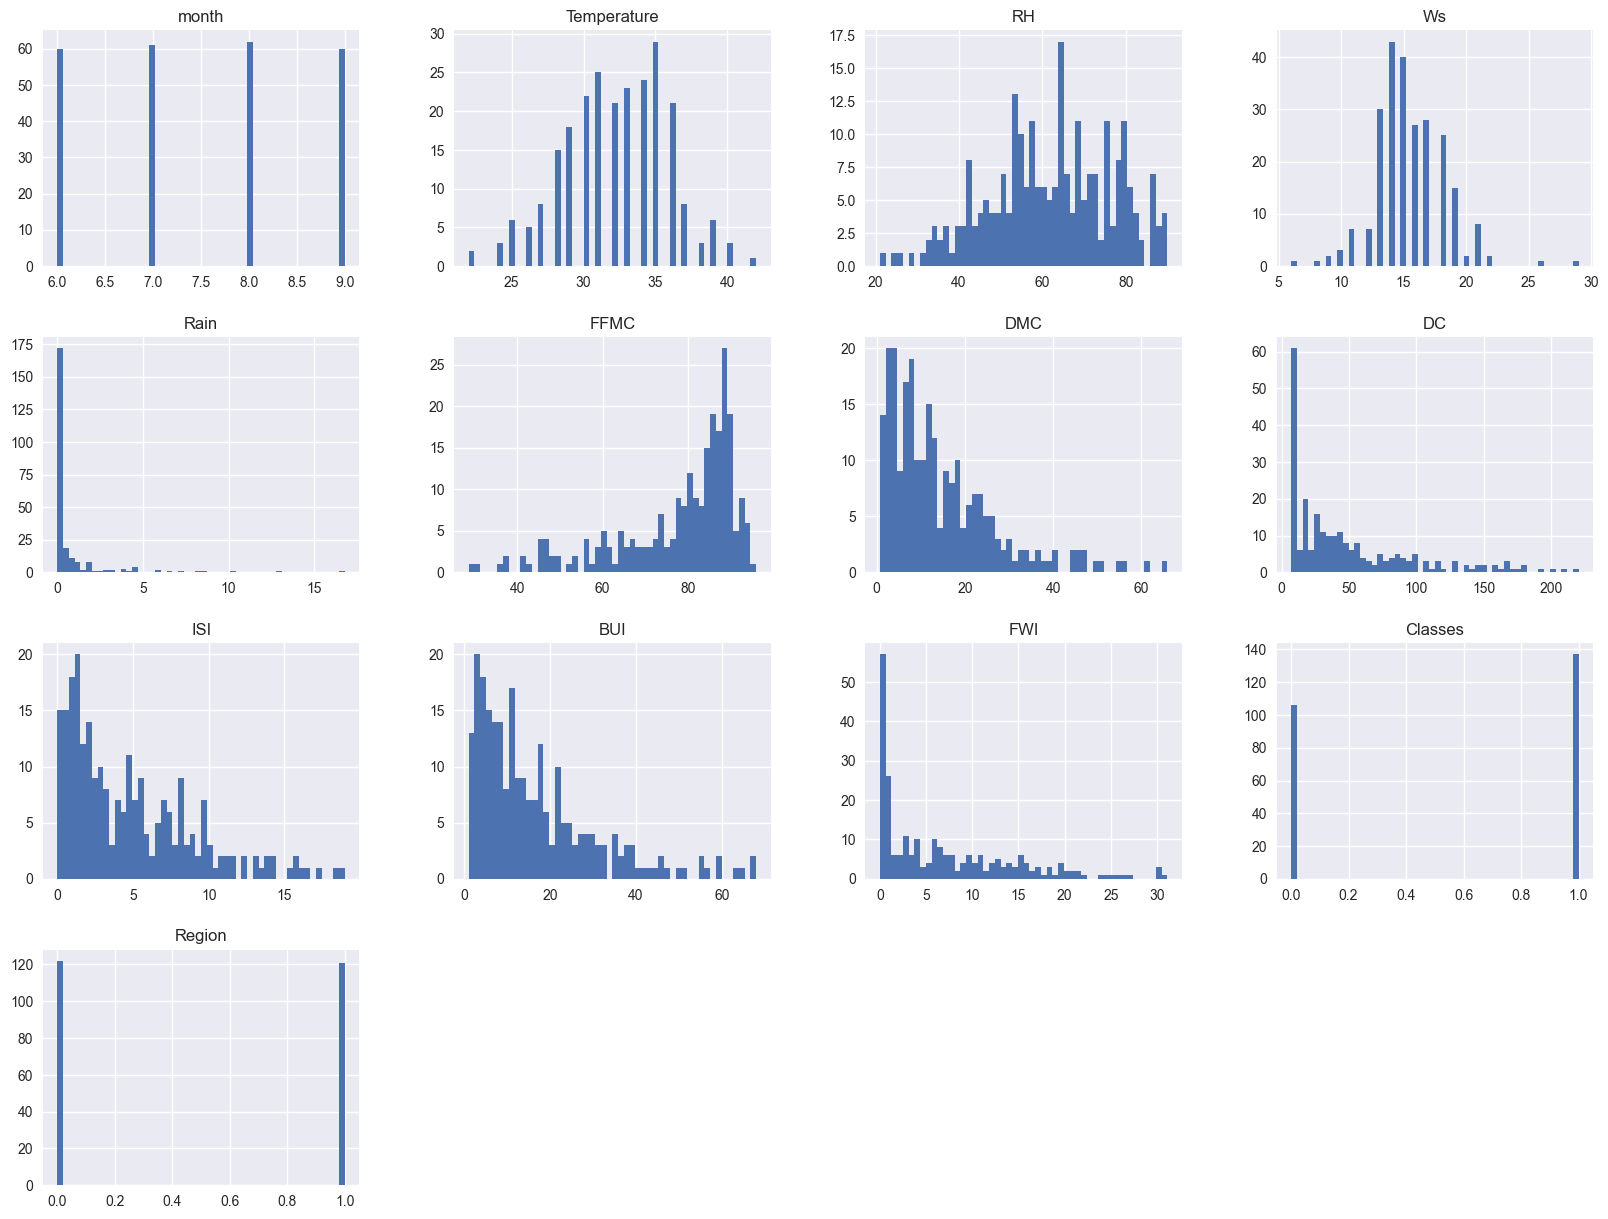

In [33]:
plt.style.use('seaborn-v0_8')
df.hist(bins=50,figsize=(20,15))
plt.show() 

In [34]:
percentage=df['Classes'].value_counts(normalize=True)*100

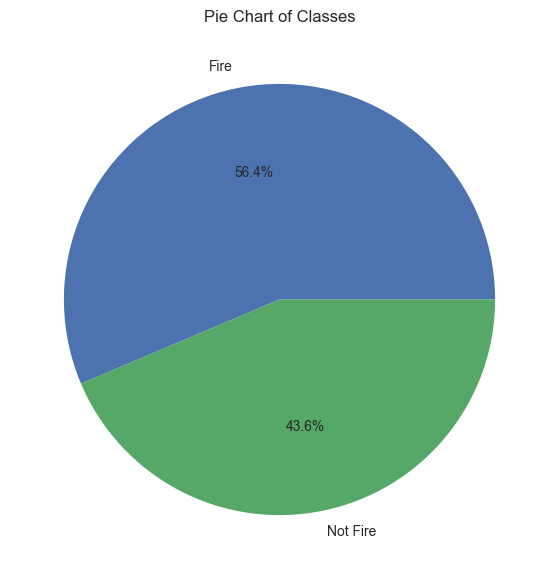

In [35]:
# plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

<Axes: ylabel='FWI'>

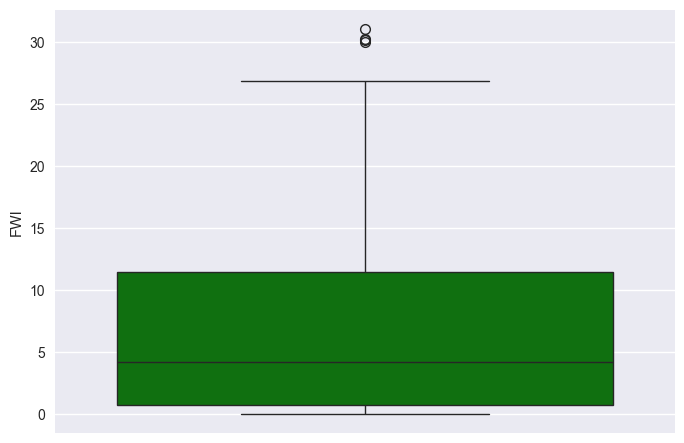

In [36]:
sns.boxplot(df['FWI'],color='green')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

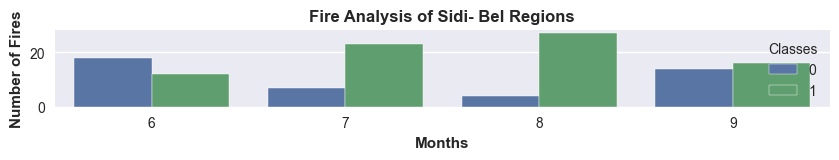

In [37]:
daatset1=df[df["Region"]==1]
plt.subplots(figsize=(10,1))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=daatset1)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')


Text(0.5, 1.0, 'Fire Analysis of Brajaya Regions')

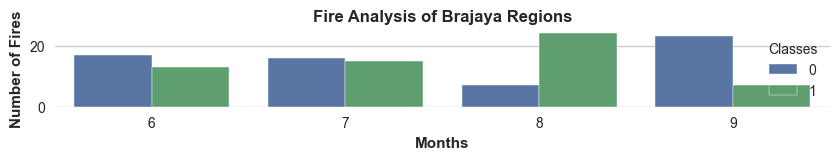

In [38]:
daatset2=df[df["Region"]==0]
plt.subplots(figsize=(10,1))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=daatset2)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brajaya Regions",weight='bold')


In [53]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [56]:
X_train.corr()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
month,1.000000,-0.015272,-0.031036,-0.037508,0.008632,-0.006620,0.053308,0.121493,0.076010,0.074529,0.005476,-0.014930
Temperature,-0.015272,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.031036,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.037508,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,0.008632,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,-0.006620,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.053308,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.121493,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.076010,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.074529,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897


In [57]:
def correlation(df,threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [58]:
corr_features=correlation(X_train,0.85)

In [59]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [60]:
corr_features

{'BUI', 'DC'}

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test) 

mae 0.5662065166333041
R2 score 0.9842781874265487


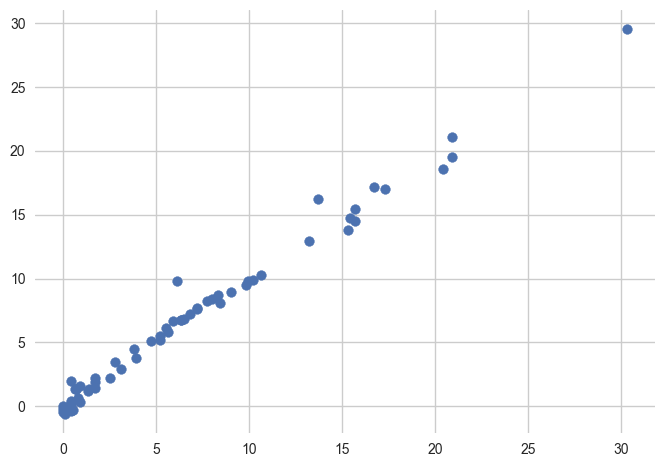

In [62]:
##Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)


mae 1.133175994914409
R2 score 0.9492020263112388


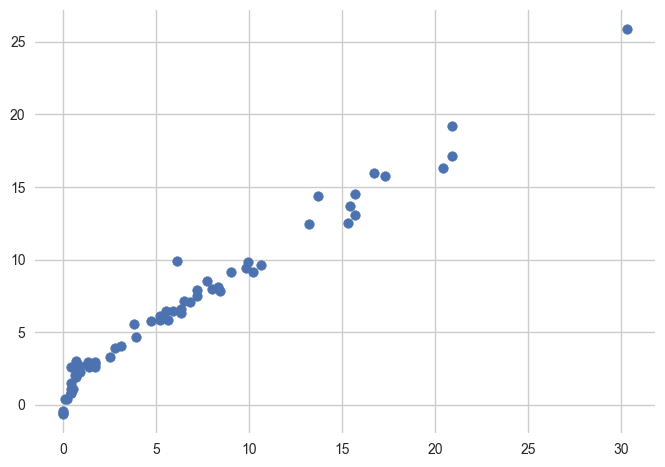

In [63]:
##Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
laso=Lasso()
laso.fit(X_train_scaled,y_train)
y_pred=laso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)


mae 0.6290381186894703
R2 score 0.9817622454942999


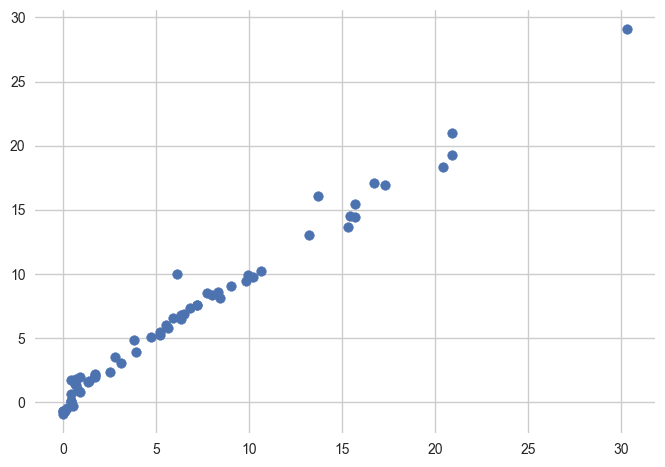

In [64]:
##cross validation lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasocv=LassoCV(cv=5)
lasocv.fit(X_train_scaled,y_train)
y_pred=lasocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)


mae 0.5795459271852443
R2 score 0.9837092476935569


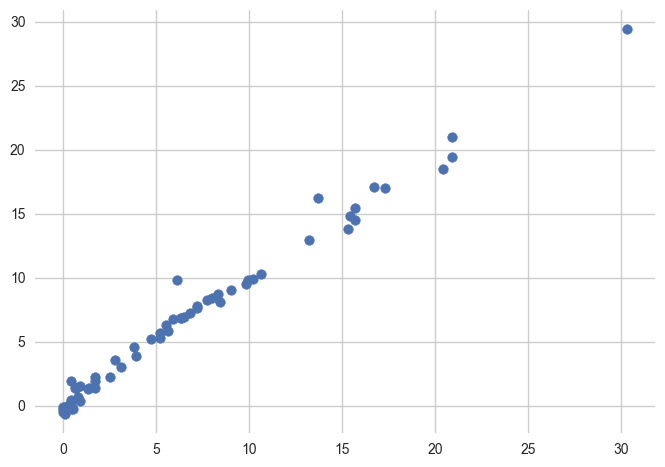

In [65]:
##Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)


mae 0.5795459271852443
R2 score 0.9837092476935569


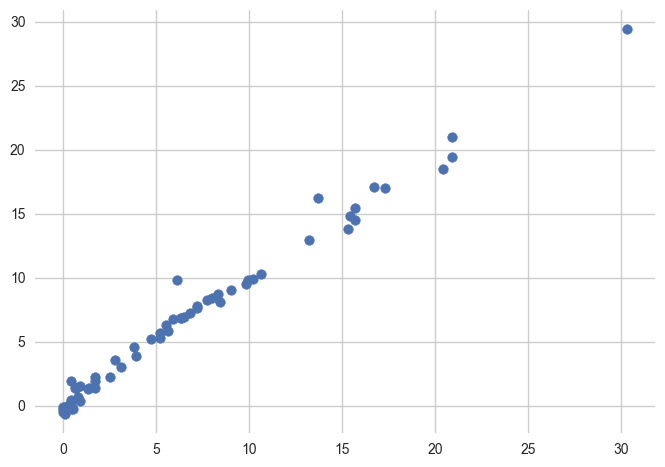

In [66]:
##cross validation ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)


mae 1.8822352387195778
R2 score 0.8753460815219092


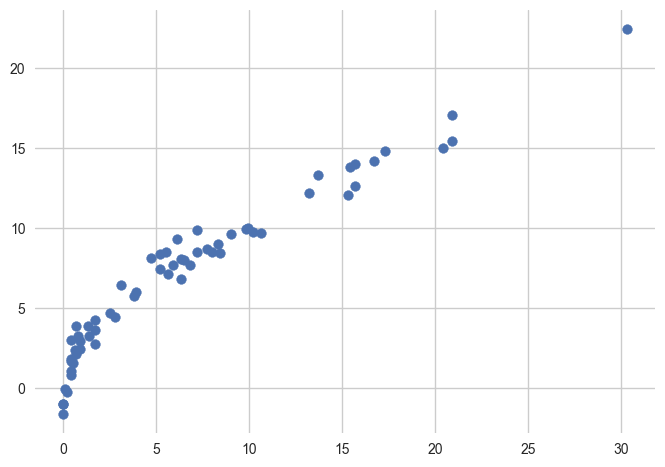

In [67]:
##Elasticnet Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)


mae 0.6656425440004985
R2 score 0.9809202940458158


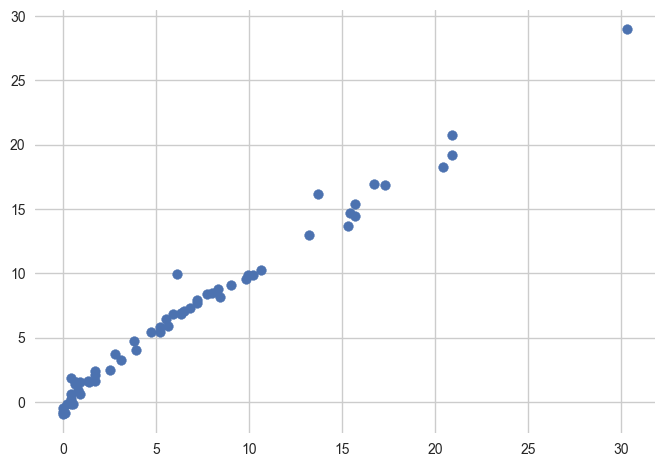

In [68]:
##cross validation elasticnet
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticv=ElasticNetCV(cv=5)
elasticv.fit(X_train_scaled,y_train)
y_pred=elasticv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)


In [69]:
##pickling
##considering ridge regression 
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))